# Edible vs Poisonous Mushroom Classification

## Load Dataset

Number of images per category: {'edible_mushroom': 715, 'poisonous_mushroom': 860}

Displaying sample images...


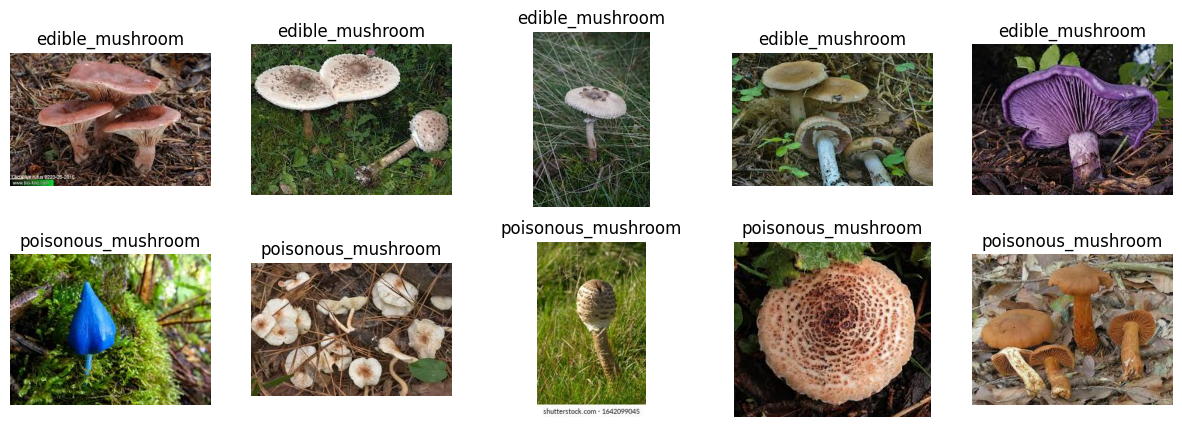


Image size distribution:
Counter({(259, 194): 22, (275, 183): 21, (194, 259): 3, (274, 184): 3, (220, 165): 3, (183, 275): 2, (300, 168): 2, (271, 186): 2, (260, 194): 2, (273, 185): 2, (265, 190): 2, (189, 267): 2, (255, 198): 2, (250, 202): 1, (248, 203): 1, (266, 190): 1, (283, 178): 1, (258, 195): 1, (180, 280): 1, (199, 253): 1, (276, 182): 1, (221, 228): 1, (261, 193): 1, (173, 280): 1, (238, 212): 1, (252, 200): 1, (217, 232): 1, (250, 190): 1, (231, 218): 1, (206, 245): 1, (218, 231): 1, (262, 192): 1, (249, 203): 1, (299, 168): 1, (190, 266): 1, (208, 242): 1, (284, 178): 1, (226, 223): 1, (270, 187): 1, (256, 197): 1, (266, 189): 1, (258, 196): 1, (268, 188): 1, (205, 246): 1, (254, 198): 1})


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from glob import glob

# Path to the dataset
dataset_path = r"S:\\College\\mushroom_project\\dataset"

# Count the number of images per category
def count_images(dataset_path):
    categories = os.listdir(dataset_path)
    counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}
    return counts

# Display sample images
def show_sample_images(dataset_path, num_samples=5):
    categories = os.listdir(dataset_path)
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 5))

    if len(categories) == 1:  # If there is only one category, adjust axes to 1D
        axes = [axes]

    for i, category in enumerate(categories):
        img_paths = []
        for ext in ["*.jpg", "*.jpeg", "*.png"]:  # Search for all image formats
            img_paths.extend(glob(os.path.join(dataset_path, category, ext)))

        img_paths = img_paths[:num_samples]  # Select the requested number of images

        for j, img_path in enumerate(img_paths):
            img = Image.open(img_path)
            axes[i][j].imshow(img)
            axes[i][j].axis("off")
            axes[i][j].set_title(category)

    plt.show()

# Check image sizes
def check_image_sizes(dataset_path):
    sizes = []
    for category in os.listdir(dataset_path):
        img_paths = []
        for ext in ["*.jpg", "*.jpeg", "*.png"]:
            img_paths.extend(glob(os.path.join(dataset_path, category, ext)))

        for img_path in img_paths[:50]:  # Check the first 50 images
            with Image.open(img_path) as img:
                sizes.append(img.size)

    return Counter(sizes)

# Execute functions
image_counts = count_images(dataset_path)
print("Number of images per category:", image_counts)

print("\nDisplaying sample images...")
show_sample_images(dataset_path)

print("\nImage size distribution:")
image_sizes = check_image_sizes(dataset_path)
print(image_sizes)

## Image Resizing

✅ Resizing complete! Images are saved in: S:/College/mushroom_project/dataset_resized


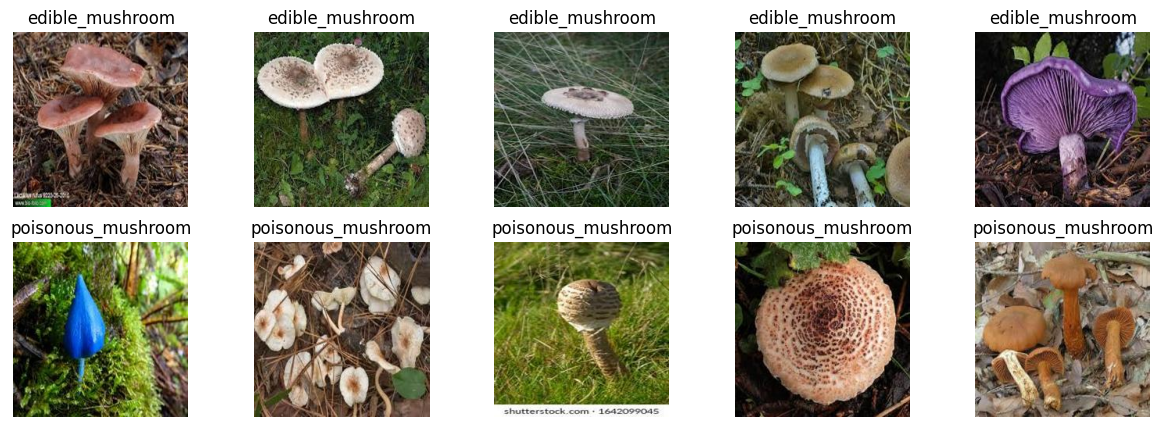


Image size distribution:
Counter({(224, 224): 100})


In [ ]:
# Original dataset path and output folder
dataset_path = "S:/College/mushroom_project/dataset"
output_path = "S:/College/mushroom_project/dataset_resized"

# Target size
target_size = (224, 224)

# Ensure the output folder exists
os.makedirs(output_path, exist_ok=True)

# Loop through each category (edible_mushroom, poisonous_mushroom)
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    output_category_path = os.path.join(output_path, category)

    # Ensure the category folder exists in the output directory
    os.makedirs(output_category_path, exist_ok=True)

    # Loop through each image in the category
    for img_path in glob(os.path.join(category_path, "*.jpg")):
        try:
            img = Image.open(img_path)
            img = img.convert("RGB")  # Convert to RGB to avoid RGBA errors
            img = img.resize(target_size)  # Resize to 224x224
            img.save(os.path.join(output_category_path, os.path.basename(img_path)))
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

# Check image sizes
def check_image_sizes(dataset_path):
    sizes = []
    for category in os.listdir(dataset_path):
        img_paths = []
        for ext in ["*.jpg", "*.jpeg", "*.png"]:
            img_paths.extend(glob(os.path.join(dataset_path, category, ext)))

        for img_path in img_paths[:50]:  # Check the first 50 images
            with Image.open(img_path) as img:
                sizes.append(img.size)

    return Counter(sizes)

print("✅ Resizing complete! Images are saved in:", output_path)

# Path to the resized dataset
resized_dataset_path = "S:/College/mushroom_project/dataset_resized"

# Display sample images
def show_resized_samples(dataset_path, num_samples=5):
    categories = os.listdir(dataset_path)
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 5))

    for i, category in enumerate(categories):
        img_paths = glob(os.path.join(dataset_path, category, "*.jpg"))[:num_samples]
        for j, img_path in enumerate(img_paths):
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            axes[i, j].set_title(category)

    plt.show()

# Execute functions
show_resized_samples(resized_dataset_path)
print("\nImage size distribution:")
image_sizes = check_image_sizes(resized_dataset_path)
print(image_sizes)

## Train-Test Split

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Path dataset
dataset_path = 'S:\College\mushroom_project\dataset_resized'

# Transformasi untuk training dataset (augmentasi)
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.ToTensor(),  # Convert to tensor sebelum operasi yang butuh tensor
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3), value='random'),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Transformasi untuk testing dataset (tanpa augmentasi)
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset terpisah untuk train dan test
full_dataset = datasets.ImageFolder(root=dataset_path)

# Split dataset
total_data = len(full_dataset)
train_size = int(0.8 * total_data)
test_size = total_data - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Gunakan kembali ImageFolder dengan transformasi berbeda
train_dataset = datasets.ImageFolder(root=dataset_path, transform=train_transforms)
test_dataset = datasets.ImageFolder(root=dataset_path, transform=test_transforms)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Check jumlah data
print(f"Total data: {total_data}")
print(f"Training data: {train_size}, Testing data: {test_size}")
print(f"Total batch train: {len(train_loader)}, Total batch test: {len(test_loader)}")

Total data: 1558
Training data: 1246, Testing data: 312
Total batch train: 49, Total batch test: 49


## Using Pretrained CNN Model (DenseNet-121)

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm  # Progress bar

# Cek apakah GPU tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load DenseNet-121 Pretrained Model
model = models.densenet121(pretrained=True)

# Ubah Fully Connected Layer agar sesuai dengan jumlah kelas (edible/poisonous)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, 2)  # 2 classes: Edible & Poisonous

# Kirim model ke GPU/CPU
model = model.to(device)

# Loss function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training function
def train_model(model, train_loader, epochs):
    model.train()  # Set mode training
    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0
        loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=True)

        for inputs, labels in loop:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

            # Update progress bar
            loop.set_postfix(loss=running_loss / total, acc=100 * correct / total)

        print(f"🔹 Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

# Jalankan training
train_model(model, train_loader, epochs=25)

Using device: cuda


Epoch 1/25: 100%|██████████| 49/49 [00:39<00:00,  1.25it/s, acc=65.3, loss=0.0194]


🔹 Epoch 1, Loss: 0.6179, Accuracy: 65.34%


Epoch 2/25: 100%|██████████| 49/49 [00:38<00:00,  1.26it/s, acc=74.7, loss=0.0158]


🔹 Epoch 2, Loss: 0.5010, Accuracy: 74.71%


Epoch 3/25: 100%|██████████| 49/49 [00:38<00:00,  1.26it/s, acc=79.8, loss=0.0138]


🔹 Epoch 3, Loss: 0.4375, Accuracy: 79.85%


Epoch 4/25: 100%|██████████| 49/49 [00:38<00:00,  1.26it/s, acc=83.7, loss=0.0119]


🔹 Epoch 4, Loss: 0.3787, Accuracy: 83.70%


Epoch 5/25: 100%|██████████| 49/49 [00:39<00:00,  1.26it/s, acc=85.8, loss=0.0103]


🔹 Epoch 5, Loss: 0.3266, Accuracy: 85.75%


Epoch 6/25: 100%|██████████| 49/49 [00:39<00:00,  1.25it/s, acc=86.5, loss=0.00957]


🔹 Epoch 6, Loss: 0.3042, Accuracy: 86.46%


Epoch 7/25: 100%|██████████| 49/49 [00:39<00:00,  1.23it/s, acc=88.2, loss=0.0087]


🔹 Epoch 7, Loss: 0.2765, Accuracy: 88.19%


Epoch 8/25: 100%|██████████| 49/49 [00:40<00:00,  1.22it/s, acc=90.1, loss=0.00813]


🔹 Epoch 8, Loss: 0.2585, Accuracy: 90.12%


Epoch 9/25: 100%|██████████| 49/49 [00:39<00:00,  1.24it/s, acc=89.8, loss=0.00756]


🔹 Epoch 9, Loss: 0.2405, Accuracy: 89.79%


Epoch 10/25: 100%|██████████| 49/49 [00:39<00:00,  1.25it/s, acc=91.8, loss=0.00641]


🔹 Epoch 10, Loss: 0.2037, Accuracy: 91.85%


Epoch 11/25: 100%|██████████| 49/49 [00:39<00:00,  1.25it/s, acc=92.8, loss=0.00556]


🔹 Epoch 11, Loss: 0.1769, Accuracy: 92.81%


Epoch 12/25: 100%|██████████| 49/49 [00:39<00:00,  1.25it/s, acc=92.7, loss=0.00543]


🔹 Epoch 12, Loss: 0.1726, Accuracy: 92.75%


Epoch 13/25: 100%|██████████| 49/49 [00:39<00:00,  1.26it/s, acc=94, loss=0.00471]


🔹 Epoch 13, Loss: 0.1499, Accuracy: 93.97%


Epoch 14/25: 100%|██████████| 49/49 [00:39<00:00,  1.25it/s, acc=94.2, loss=0.0048]


🔹 Epoch 14, Loss: 0.1526, Accuracy: 94.22%


Epoch 15/25: 100%|██████████| 49/49 [00:38<00:00,  1.26it/s, acc=94.4, loss=0.00442]


🔹 Epoch 15, Loss: 0.1405, Accuracy: 94.35%


Epoch 16/25: 100%|██████████| 49/49 [00:39<00:00,  1.25it/s, acc=94.4, loss=0.00401]


🔹 Epoch 16, Loss: 0.1275, Accuracy: 94.42%


Epoch 17/25: 100%|██████████| 49/49 [00:39<00:00,  1.25it/s, acc=95.5, loss=0.00392]


🔹 Epoch 17, Loss: 0.1247, Accuracy: 95.51%


Epoch 18/25: 100%|██████████| 49/49 [00:38<00:00,  1.26it/s, acc=96, loss=0.00329]


🔹 Epoch 18, Loss: 0.1047, Accuracy: 96.02%


Epoch 19/25: 100%|██████████| 49/49 [00:38<00:00,  1.26it/s, acc=96.7, loss=0.0029]


🔹 Epoch 19, Loss: 0.0922, Accuracy: 96.73%


Epoch 20/25: 100%|██████████| 49/49 [00:38<00:00,  1.27it/s, acc=96.6, loss=0.0032]


🔹 Epoch 20, Loss: 0.1017, Accuracy: 96.60%


Epoch 21/25: 100%|██████████| 49/49 [00:38<00:00,  1.27it/s, acc=96, loss=0.00323]


🔹 Epoch 21, Loss: 0.1026, Accuracy: 95.96%


Epoch 22/25: 100%|██████████| 49/49 [00:38<00:00,  1.26it/s, acc=95.5, loss=0.00391]


🔹 Epoch 22, Loss: 0.1245, Accuracy: 95.51%


Epoch 23/25: 100%|██████████| 49/49 [00:38<00:00,  1.27it/s, acc=96.2, loss=0.00291]


🔹 Epoch 23, Loss: 0.0925, Accuracy: 96.21%


Epoch 24/25: 100%|██████████| 49/49 [00:38<00:00,  1.27it/s, acc=95.6, loss=0.00316]


🔹 Epoch 24, Loss: 0.1006, Accuracy: 95.64%


Epoch 25/25: 100%|██████████| 49/49 [00:38<00:00,  1.27it/s, acc=96.9, loss=0.00274]

🔹 Epoch 25, Loss: 0.0870, Accuracy: 96.92%


🔹 Test Accuracy: 99.68%


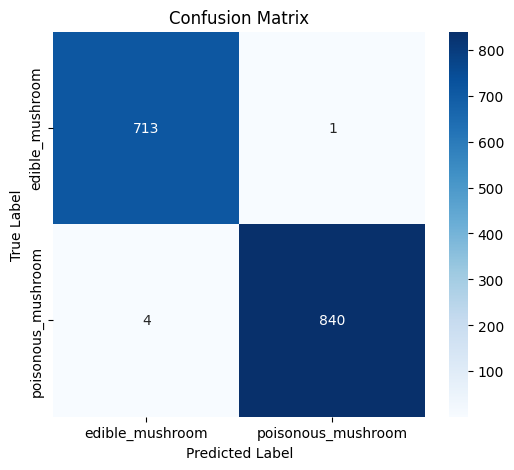

🔹 Classification Report:
                    precision    recall  f1-score   support

   edible_mushroom       0.99      1.00      1.00       714
poisonous_mushroom       1.00      1.00      1.00       844

          accuracy                           1.00      1558
         macro avg       1.00      1.00      1.00      1558
      weighted avg       1.00      1.00      1.00      1558



In [ ]:
from sklearn.metrics import accuracy_score # Import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    print(f"🔹 Test Accuracy: {accuracy * 100:.2f}%")

    # Fix: Ambil label dari dataset asli
    class_names = dataset.classes

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    print("🔹 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

# Jalankan evaluasi lagi
evaluate_model(model, test_loader)

In [ ]:
torch.save(model.state_dict(), "mushroom_classifier.pth")